# Linear Regression: Increase in Sales with increase in Ads

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
import pylab as pl
import pandas as pd

seaborn.set()

## Linear Regression

Linear Regression is a supervised learning algorithm that models the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variable) denoted X.

Generate some data:

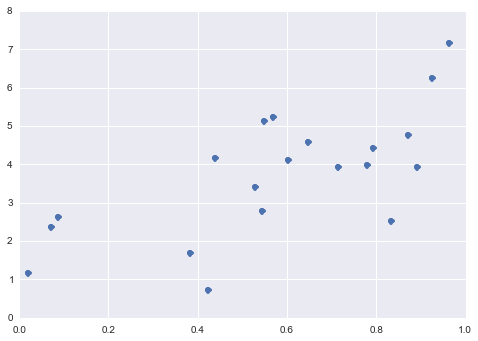

In [2]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

Fit the model:

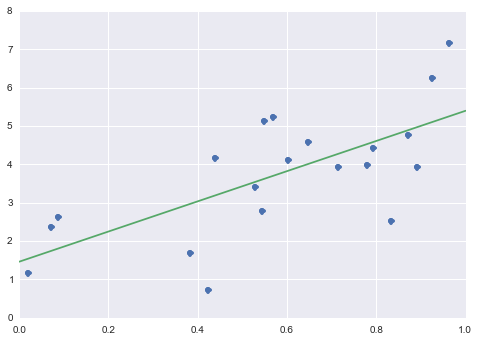

In [3]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

###Case Study:

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [4]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)

In [5]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 observations, and thus 200 markets in the dataset.

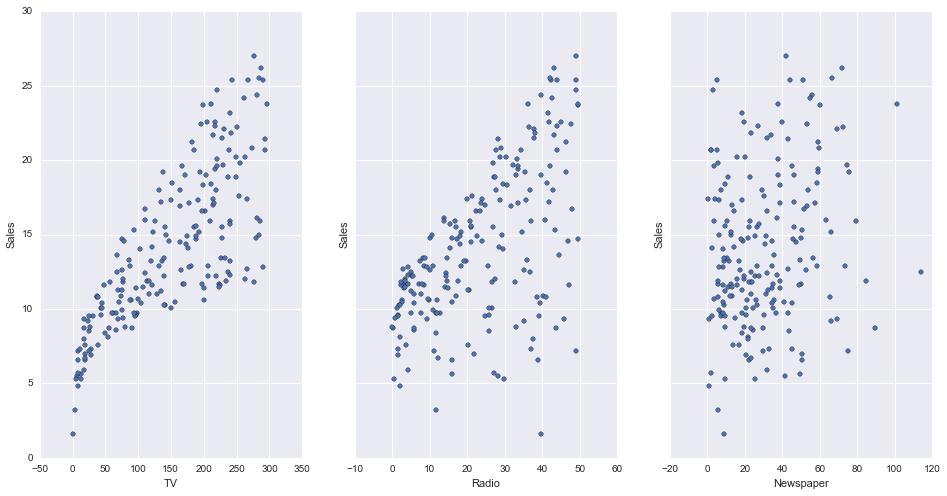

In [6]:
# visualize the relationship between the features 
# and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

Questions About the Advertising Data:

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

Is there a relationship between ads and sales?

And many more!

**Simple Linear Regression**: Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

y=β0+β1x

What does each term represent?

y is the response

x is the feature

β0 is the intercept, β1 is the coefficient for x

Together, β0 and β1 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

**Estimating ("Learning") Model Coefficients**: Let's use Statsmodels to estimate the model coefficients for the advertising data.

In [7]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

**Interpreting Model Coefficients**
How do we interpret the TV coefficient (β1)?

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
Or more clearly: An additional $1,000 spent on


**Using the Model for Prediction**

In [8]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of 9,409 widgets in that market.

Of course, we can also use Statsmodels to make the prediction:

In [9]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [10]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

**Plotting the Least Squares Line**
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

In [ ]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

In [ ]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)